# Jupyter: interactive python notebook¶
The Jupyter Notebook is an open-source web application that allows you to create and share documents that contain live code, equations, visualizations and explanatory text.
[Documentation](http://jupyter.org/)

# Requests : super simple requests
Warning: Recreational use of other HTTP libraries may result in dangerous side-effects, including: security vulnerabilities, verbose code, reinventing the wheel, constantly reading documentation, depression, headaches, or even death.

In [ ]:
import requests
r = requests.get('https://api.github.com/users/LucasBerbesson/repos')
data = r.json()

for element in data:
    print(element['language'],":", element['clone_url'])

# BeautifulSoup : XML and HTML parser
A Python library for pulling data out of HTML and XML files. [Documentation](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)

In [1]:
# Find all alternative softwares
import requests
from IPython.core.display import display, HTML
from bs4 import BeautifulSoup

def find_alternatives(app_name):
    alternatives = []
    print("Searching web for {} alternatives...".format(app_name))
    r = requests.get('http://alternativeto.net/software/'+app_name+'/')
    soup = BeautifulSoup(r.text, "lxml")
    for link in soup.select("article > div.col-xs-2.col-sm-2.col-lg-1 > div.like-box > span"):
        alternatives.append({"name":link.findNext('a')['data-urlname'], "score":link.text})
    
    return alternatives

In [2]:
print(find_alternatives("Python"))

Searching web for Python alternatives...
[{'score': '514', 'name': 'java'}, {'score': '237', 'name': 'c-programming-language-'}, {'score': '219', 'name': 'ruby'}, {'score': '228', 'name': 'cpp'}, {'score': '154', 'name': 'c--programming-language-'}, {'score': '80', 'name': 'go-programming-language-'}, {'score': '144', 'name': 'r-project'}, {'score': '126', 'name': 'lua'}, {'score': '50', 'name': 'haskell'}, {'score': '109', 'name': 'perl'}, {'score': '57', 'name': 'scala'}, {'score': '43', 'name': 'd'}, {'score': '57', 'name': 'dart'}, {'score': '36', 'name': 'julia'}, {'score': '18', 'name': 'nim-programming-language'}]


# Pretty Print
The pprint module provides a capability to “pretty-print” arbitrary Python data structures in a form which can be used as input to the interpreter

In [3]:
from pprint import pprint
pprint(find_alternatives("ifttt"))

Searching web for ifttt alternatives...
[{'name': 'zapier', 'score': '131'},
 {'name': 'tasker', 'score': '94'},
 {'name': 'huginn', 'score': '39'},
 {'name': 'microsoft-flow', 'score': '17'},
 {'name': 'integromat', 'score': '21'},
 {'name': 'skyvia', 'score': '90'},
 {'name': 'rclone', 'score': '29'},
 {'name': 'bipio', 'score': '22'},
 {'name': 'cloudhq', 'score': '22'},
 {'name': 'automate-io', 'score': '11'},
 {'name': 'we-wired-web', 'score': '10'},
 {'name': 'wappwolf-automator', 'score': '18'},
 {'name': 'hooks', 'score': '8'},
 {'name': 'ellp', 'score': '4'},
 {'name': 'feedmyinbox', 'score': '4'}]


# Jinja2 : template engine
Jinja2 is a full featured template engine for Python

In [4]:
from jinja2 import Environment, FileSystemLoader

env = Environment(loader=FileSystemLoader('templates'))
jinja_template = env.get_template('jinja_demo.html')

def generate_html_page(alternatives,app_name):
    print("Generating a nice HTML Page...")
    return jinja_template.render(alternatives=alternatives, app_name=app_name)

In [6]:
with open("./templates/ifttt.html", "w+") as fh:
        fh.write(generate_html_page(find_alternatives("pycharm"), "ifttt"))




Searching web for pycharm alternatives...
Generating a nice HTML Page...


# Bottle : micro framework
Bottle is a fast, simple and lightweight WSGI micro web-framework for Python.

In [ ]:
from bottle import route, run, template


@route('/')
def index():
    return 'Go to /alternatives/app_name/'

@route('/alternatives/<app_name>/')
def hello(app_name):
    my_template = generate_html_page(find_alternatives(app_name), app_name)
    return template(my_template)

run(host='localhost', port=8080)

Bottle v0.12.13 server starting up (using WSGIRefServer())...
Listening on http://localhost:8080/
Hit Ctrl-C to quit.

127.0.0.1 - - [09/Nov/2017 14:09:56] "GET / HTTP/1.1" 200 29
127.0.0.1 - - [09/Nov/2017 14:09:57] "GET /favicon.ico HTTP/1.1" 404 742


Searching web for Python alternatives...
Generating a nice HTML Page...


127.0.0.1 - - [09/Nov/2017 14:10:04] "GET /alternatives/Python/ HTTP/1.1" 200 3384
127.0.0.1 - - [09/Nov/2017 14:10:04] "GET /alternatives/Python/Sports.png HTTP/1.1" 404 780


Searching web for java alternatives...
Generating a nice HTML Page...


127.0.0.1 - - [09/Nov/2017 14:10:11] "GET /alternatives/java/ HTTP/1.1" 200 3387
127.0.0.1 - - [09/Nov/2017 14:10:11] "GET /alternatives/java/Sports.png HTTP/1.1" 404 776


Searching web for ifttt alternatives...
Generating a nice HTML Page...


127.0.0.1 - - [09/Nov/2017 14:10:17] "GET /alternatives/ifttt/ HTTP/1.1" 200 3357
127.0.0.1 - - [09/Nov/2017 14:10:17] "GET /alternatives/ifttt/Sports.png HTTP/1.1" 404 778


# SMTPlib
The smtplib module defines an SMTP client session object that can be used to send mail to any Internet machine.

In [ ]:
alternatives = find_alternatives("ifttt")

import os
import smtplib 
server = smtplib.SMTP('smtp.gmail.com', 587)
server.starttls()
server.login("lucasberbesson@gmail.com", os.environ['MY_PWD'])
msg = "IFTTT has {} alternatives".format(len(alternatives))
server.sendmail("lucasberbesson@gmail.com","lucas.berbesson@fabdev.fr", msg)
server.quit()

# Faker : generate fake data
Faker is a Python package that generates fake data for you.Documentation

In [ ]:
from faker import Faker
f = Faker(locale="fr_FR")
name = f.name()
postcode = f.postcode()
email = f.email()
city = f.city()
color = f.hex_color()
print(name,postcode,email,city,color)

# Regex

A regular expression (or "regex") is a sequence of characters that define a search pattern.   
Usually this pattern is then used by string searching algorithms for "find" or "find and replace" operations on strings.

In [15]:
# Script to match all the fabdev.fr emails inside a .txt file
import re
results = []
# Modify the script to match all the email 
for line in open('./data/lorem.txt'):
    results = results + re.findall(r'[\w\.-]+@[\w\.-]+', line)
print(results)

['isabelle.kocher@engie.fr']


# Fuzzy wuzzy
fuzzy string matching in Python based on the standard library difflib  
[Documentation](https://github.com/seatgeek/fuzzywuzzy)

In [ ]:
from fuzzywuzzy import fuzz
print("Simple ratio : ",fuzz.ratio("this is a test", "this is a test!"))
print("Partial ratio : ",fuzz.partial_ratio("this is a test", "this is a test!"))
print("Token Ration : ",fuzz.token_sort_ratio("fuzzy wuzzy was a bear", "wuzzy fuzzy was a bear"))

In [ ]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
state_to_code = {"VERMONT": "VT", "GEORGIA": "GA", "IOWA": "IA", "Armed Forces Pacific": "AP", "GUAM": "GU",
                 "KANSAS": "KS", "FLORIDA": "FL", "AMERICAN SAMOA": "AS", "NORTH CAROLINA": "NC", "HAWAII": "HI",
                 "NEW YORK": "NY", "CALIFORNIA": "CA", "ALABAMA": "AL", "IDAHO": "ID", "FEDERATED STATES OF MICRONESIA": "FM",
                 "Armed Forces Americas": "AA", "DELAWARE": "DE", "ALASKA": "AK", "ILLINOIS": "IL",
                 "Armed Forces Africa": "AE", "SOUTH DAKOTA": "SD", "CONNECTICUT": "CT", "MONTANA": "MT", "MASSACHUSETTS": "MA",
                 "PUERTO RICO": "PR", "Armed Forces Canada": "AE", "NEW HAMPSHIRE": "NH", "MARYLAND": "MD", "NEW MEXICO": "NM",
                 "MISSISSIPPI": "MS", "TENNESSEE": "TN", "PALAU": "PW", "COLORADO": "CO", "Armed Forces Middle East": "AE",
                 "NEW JERSEY": "NJ", "UTAH": "UT", "MICHIGAN": "MI", "WEST VIRGINIA": "WV", "WASHINGTON": "WA",
                 "MINNESOTA": "MN", "OREGON": "OR", "VIRGINIA": "VA", "VIRGIN ISLANDS": "VI", "MARSHALL ISLANDS": "MH",
                 "WYOMING": "WY", "OHIO": "OH", "SOUTH CAROLINA": "SC", "INDIANA": "IN", "NEVADA": "NV", "LOUISIANA": "LA",
                 "NORTHERN MARIANA ISLANDS": "MP", "NEBRASKA": "NE", "ARIZONA": "AZ", "WISCONSIN": "WI", "NORTH DAKOTA": "ND",
                 "Armed Forces Europe": "AE", "PENNSYLVANIA": "PA", "OKLAHOMA": "OK", "KENTUCKY": "KY", "RHODE ISLAND": "RI",
                 "DISTRICT OF COLUMBIA": "DC", "ARKANSAS": "AR", "MISSOURI": "MO", "TEXAS": "TX", "MAINE": "ME"}

In [ ]:
process.extractOne("Minesotta",choices=state_to_code.keys())

In [ ]:
process.extractOne("AlaBAMMazzz",choices=state_to_code.keys(),score_cutoff=80)

## Django : the best web framework
Django is a high-level Python Web framework that encourages rapid development and clean, pragmatic design.  
Built by experienced developers, it takes care of much of the hassle of Web development, so you can focus on writing your app without needing to reinvent the wheel. It’s free and open source. [Documentation](https://docs.djangoproject.com/en/dev/). [Demo](http://www.lafabriquediy.com/)

## Flask : advanced microframework 
Flask is a microframework for Python based on Werkzeug, Jinja 2 and good intentions. 
[Documentation](http://flask.pocoo.org/)

## Pytest : tests
The pytest framework makes it easy to write small tests, yet scales to support complex functional testing for applications and libraries.[Documentation](https://docs.pytest.org/en/latest/)

From your project directory simply run `pytest` to run all `test_*.py` files

## Sphinx : beautiful python documentation

Easy and intelligent and beautiful python documentation.  
To get beautiful sphinx documentation you need :  
- to write beautiful docstrings (check the google ones in useful.py to get inspired) in your python code.
- install sphinx
- run sphinx-quickstart from your /docs folder
- Edit index.rst and create other .rstfiles if you need ReStructuredText syntax
- run make html

# Numpy
Numpy is the core library for scientific computing in Python. It provides a high-performance multidimensional array object, and tools for working with these arrays. If you are already familiar with MATLAB, you might find this tutorial useful to get started with Numpy.

In [76]:
import numpy as np

In [83]:
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])
print(np.dot(x, y))
print(x.T)
print(x.sum())
np.arange(10,51)

[[19 22]
 [43 50]]
[[1 3]
 [2 4]]
10


array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [84]:
np.eye(3)

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [87]:
np.linspace(0,1,20).reshape(4,5)

array([[ 0.        ,  0.05263158,  0.10526316,  0.15789474,  0.21052632],
       [ 0.26315789,  0.31578947,  0.36842105,  0.42105263,  0.47368421],
       [ 0.52631579,  0.57894737,  0.63157895,  0.68421053,  0.73684211],
       [ 0.78947368,  0.84210526,  0.89473684,  0.94736842,  1.        ]])

# Pandas
Pandas helps us manipulate all of this data structures efficiently.   
You can think of pandas as an extremely powerful version of Excel, with a lot more features.

In [3]:
import pandas as pd

In [5]:
df = pd.read_excel('./data/data.xlsx')

In [7]:
df.head()

,ENTITE,POLE,STATUT,NOM,PRENOM,RESPONSABLE,PROJET,WINDOW OCT. 2018,LIEU,ARRIVEE,DEPART,REMARQUES
0,DRD,GPM,prestataire,AIT-HADDOU,Ali,AKEL,Convergence,OUI,NextDoor 1,NaN,2017-10-31 00:00:00,MCO2
1,DRD,GPM,agent,AKEL,Youssef,-,Convergence,OUI,Nextdoor,NaN,NaN,NaN
2,DRD,GPM,prestataire,AMAR,Slimane,AKEL,Convergence,OUI,NextDoor 33,NaN,2019-03-01 00:00:00,NaN
3,DRD,ES,stagiaire,ARAUJO,Joao,MAROT,Apogée,NON,NextDoor,du 31/07/2017,2017-09-05 00:00:00,NaN
4,DRD,DS,intérimaire,ARAVENA,Fabiola,POULLENNEC,Optim,OUI,Versailles,NaN,NaN,A postulé pour embauche


In [67]:
# Get list of values in a column
df['PROJET'].unique()

array(['Convergence', 'Apogée', 'Optim', 'chef de programme', 'Antares',
       'Dynamo', 'chef de pôle', 'chef', 'EOD', 'imaGrid', 'iTesla',
       'appui', 'Prospective', 'Prévisions', 'infrastructure', 'Ecolo',
       'GestionActifs', 'EtudesDynamiques', 'capas', 'Stanway', 'Tension',
       'smartlab', 'conseiller', '?', nan, 'Modèles', 'Let’s Coordinate',
       'PowSyBl', 'Consignations', 'EquipeSI-R&D', 'SmartGrids', 'Osmose',
       'pertes', 'Maestro', 'SEA', 'CGMES', 'iNProve'], dtype=object)

In [68]:
# Filter the dataframe with a constraint on a column
df[df['PROJET']=="Convergence"]

,ENTITE,POLE,STATUT,NOM,PRENOM,RESPONSABLE,PROJET,WINDOW OCT. 2018,LIEU,ARRIVEE,DEPART,REMARQUES
0,DRD,GPM,prestataire,AIT-HADDOU,Ali,AKEL,Convergence,OUI,NextDoor 1,NaN,2017-10-31 00:00:00,MCO2
1,DRD,GPM,agent,AKEL,Youssef,-,Convergence,OUI,Nextdoor,NaN,NaN,NaN
2,DRD,GPM,prestataire,AMAR,Slimane,AKEL,Convergence,OUI,NextDoor 33,NaN,2019-03-01 00:00:00,NaN
12,DRD,GPM,prestataire,BEN TEMESSEK,Seifallah,AKEL,Convergence,OUI,ND 26,NaN,2019-03-01 00:00:00,NaN
16,DRD,GPM,prestataire,BERTRAND,Jérémy,AKEL,Convergence,OUI,NextDoor 33,NaN,2019-03-01 00:00:00,NaN
19,DRD,GPM,agent,BISERICA,Monica,-,Convergence,OUI,Nextdoor,NaN,NaN,NaN
20,DRD,GPM,prestataire,BITTA,Gilbert,AKEL,Convergence,OUI,NextDoor 1,NaN,2017-10-20 00:00:00,MCO2
24,DRD,GPM,prestataire,BORSENBERGER,Jacques,AKEL,Convergence,OUI,NextDoor 33,NaN,2019-03-01 00:00:00,NaN
30,DRD,GPM,prestataire,BOUSSAND,Christelle,AKEL,Convergence,OUI,NextDoor 33,NaN,2019-03-01 00:00:00,NaN
34,DRD,GPM,prestataire,BRIOT,Aurélien,AKEL,Convergence,OUI,ND1,NaN,2019-03-01 00:00:00,MCO2


# Seaborn
Seaborn is a Visualization library that goes along with pandas

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

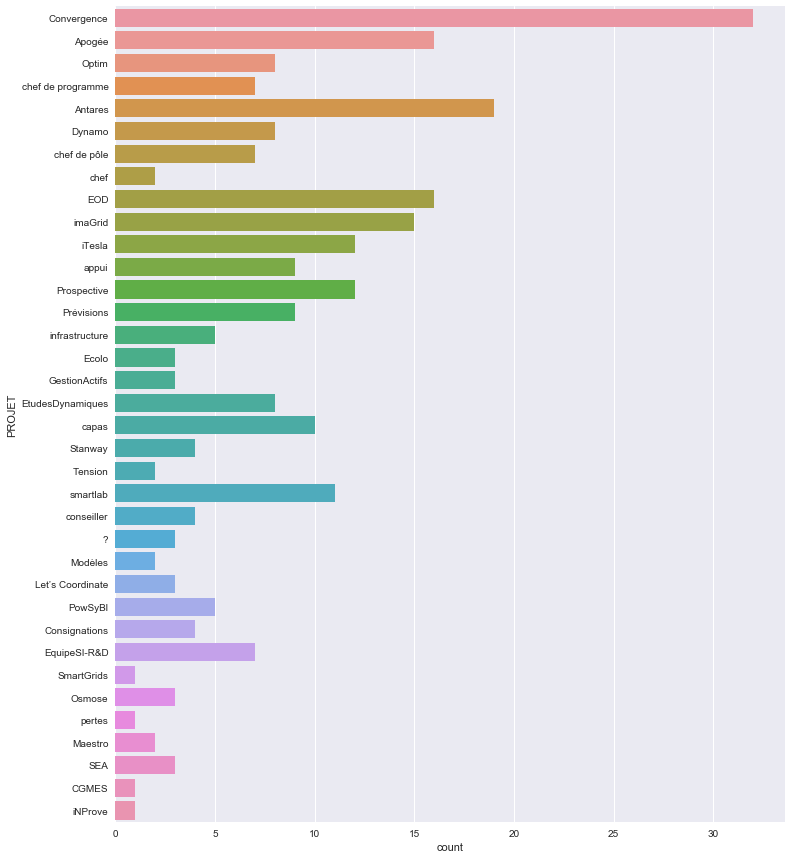

In [75]:
plt.figure(figsize=(12,15))
sns.countplot(y='PROJET',data=df);

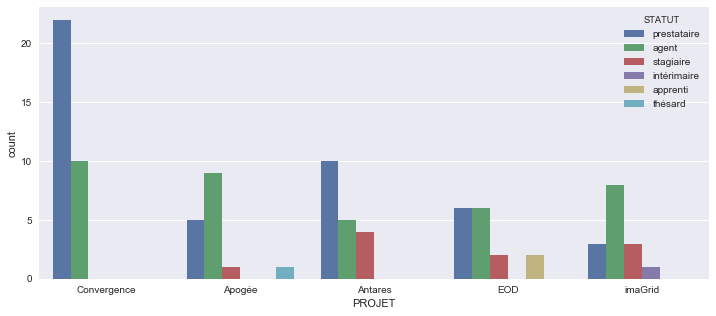

In [73]:
plt.figure(figsize=(12,5))
sns.countplot(x='PROJET',hue='STATUT',data=df[df['PROJET'].isin(['Convergence', 'Apogée','Antares','EOD','imaGrid'])]);